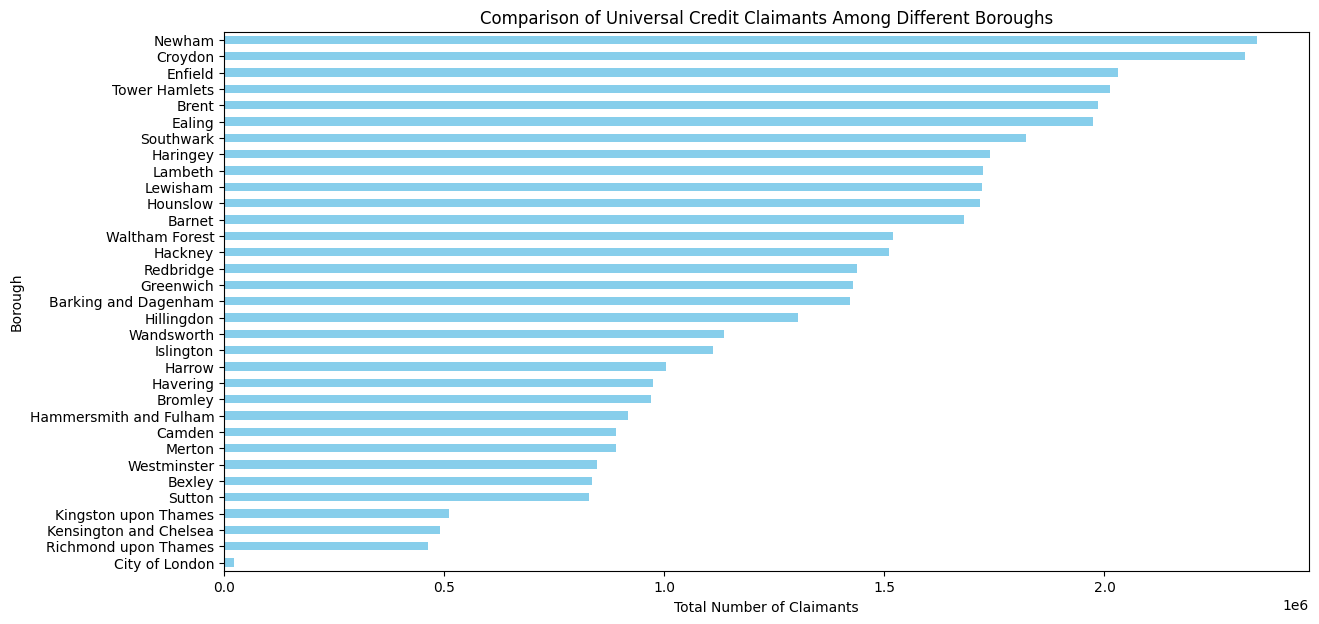

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
uc_claimants = pd.read_csv('People_UC_Borough.csv')

# Group by Borough and sum the claimants
borough_comparison = uc_claimants.groupby('National - Regional - LA - OAs')['People on Universal Credit'].sum().sort_values()

# Filter out the total bar from the comparison
borough_comparison_filtered = borough_comparison[borough_comparison.index != 'Total']

# Plot the comparison without the total bar
plt.figure(figsize=(14, 7))
borough_comparison_filtered.plot(kind='barh', color='skyblue')
plt.title('Comparison of Universal Credit Claimants Among Different Boroughs')
plt.xlabel('Total Number of Claimants')
plt.ylabel('Borough')
plt.show()


<ipython-input-16-cfc5a94c95c4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uc_claimants_filtered['dttm'] = pd.to_datetime(uc_claimants_filtered['dttm'])


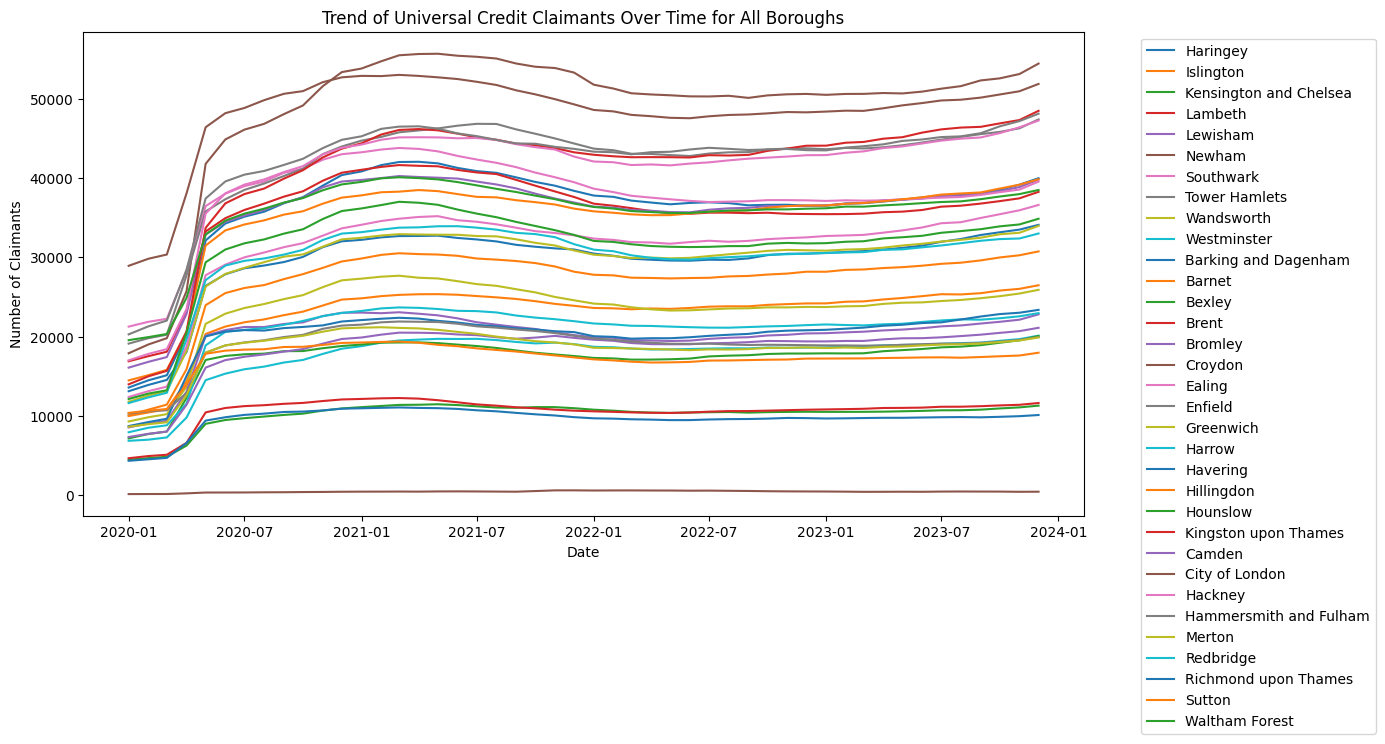

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
uc_claimants = pd.read_csv('People_UC_Borough.csv')

# Remove 'Total' entries
uc_claimants_filtered = uc_claimants[uc_claimants['National - Regional - LA - OAs'] != 'Total']

# Convert the 'dttm' column to datetime format
uc_claimants_filtered['dttm'] = pd.to_datetime(uc_claimants_filtered['dttm'])

# Plot the trend over time
plt.figure(figsize=(14, 7))
for borough in uc_claimants_filtered['National - Regional - LA - OAs'].unique():
    borough_data = uc_claimants_filtered[uc_claimants_filtered['National - Regional - LA - OAs'] == borough]
    plt.plot(borough_data['dttm'], borough_data['People on Universal Credit'], label=borough)

plt.title('Trend of Universal Credit Claimants Over Time for All Boroughs')
plt.xlabel('Date')
plt.ylabel('Number of Claimants')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



<ipython-input-17-ed8411998581>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uc_claimants_filtered['Monthly Increase'] = uc_claimants_filtered.groupby('National - Regional - LA - OAs')['People on Universal Credit'].diff()
<ipython-input-17-ed8411998581>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uc_claimants_filtered.fillna(0, inplace=True)


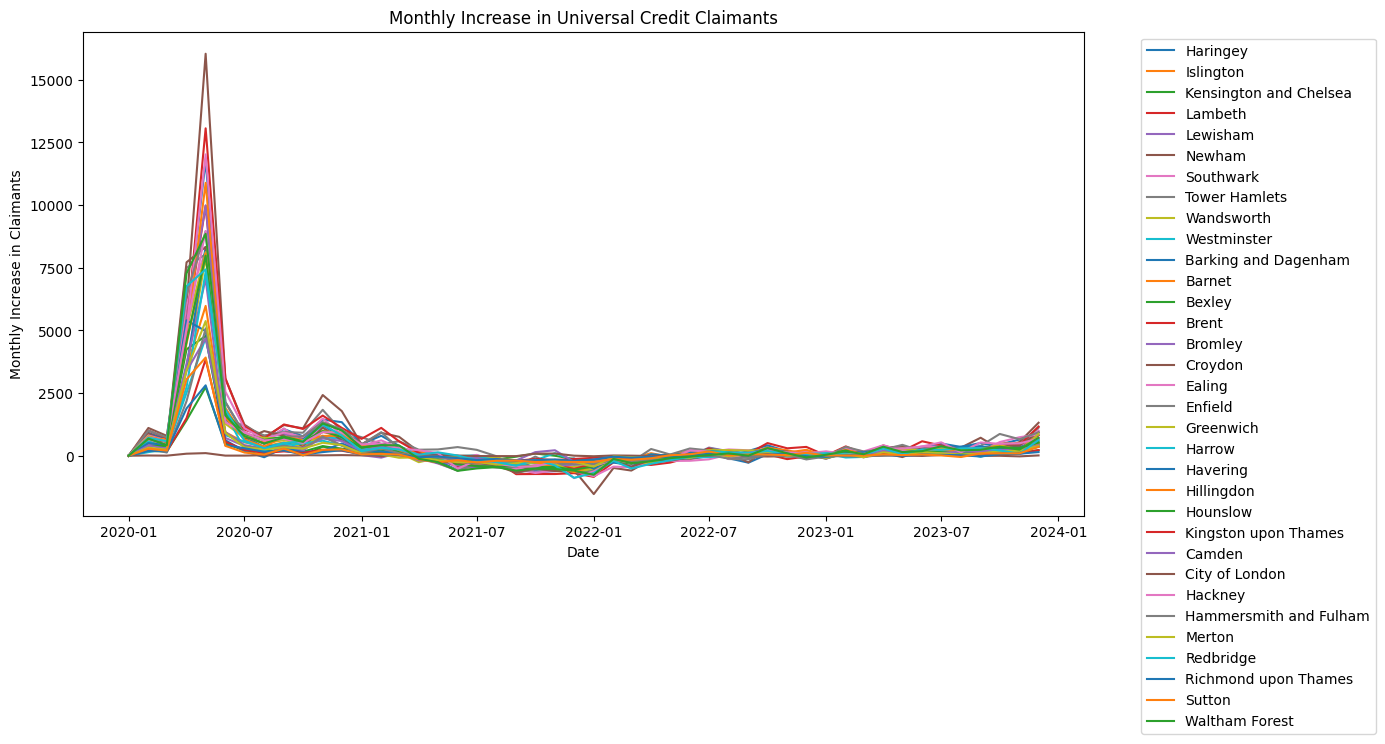

In [ ]:
# Calculate the monthly increase
uc_claimants_filtered['Monthly Increase'] = uc_claimants_filtered.groupby('National - Regional - LA - OAs')['People on Universal Credit'].diff()

# Ensure no NaN values for plotting
uc_claimants_filtered.fillna(0, inplace=True)

# Plot the monthly increase for a selected sample of boroughs to avoid issues
selected_boroughs = uc_claimants_filtered['National - Regional - LA - OAs'].unique()

plt.figure(figsize=(14, 7))
for borough in selected_boroughs:
    borough_data = uc_claimants_filtered[uc_claimants_filtered['National - Regional - LA - OAs'] == borough]
    plt.plot(borough_data['dttm'], borough_data['Monthly Increase'], label=borough)

plt.title('Monthly Increase in Universal Credit Claimants')
plt.xlabel('Date')
plt.ylabel('Monthly Increase in Claimants')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

